# 1. Data Import

[Download](https://www.kaggle.com/arpitjain007/game-of-deep-learning-ship-datasets)

data 디렉토리에 저장하기

In [1]:
import os, shutil
import pandas as pd

In [2]:
# original location
data_dir = os.getcwd() + '\\data\\train\\images'
# destination
dest_dir = os.getcwd() + '\\data\\splited'

# split data train/valid/test
train_dir = os.path.join(dest_dir, 'train')
validation_dir = os.path.join(dest_dir, 'valid')
test_dir = os.path.join(dest_dir, 'test')

train_Cargo_dir = os.path.join(train_dir, 'Cargo')
train_Military_dir = os.path.join(train_dir, 'Military')
train_Carrier_dir = os.path.join(train_dir, 'Carrier')
train_Cruise_dir = os.path.join(train_dir, 'Cruise')
train_Tankers_dir = os.path.join(train_dir, 'Tanker')

validation_Cargo_dir = os.path.join(validation_dir, 'Cargo')
validation_Military_dir = os.path.join(validation_dir, 'Military')
validation_Carrier_dir = os.path.join(validation_dir, 'Carrier')
validation_Cruise_dir = os.path.join(validation_dir, 'Cruise')
validation_Tankers_dir = os.path.join(validation_dir, 'Tanker')

test_Cargo_dir = os.path.join(test_dir, 'Cargo')
test_Military_dir = os.path.join(test_dir, 'Military')
test_Carrier_dir = os.path.join(test_dir, 'Carrier')
test_Cruise_dir = os.path.join(test_dir, 'Cruise')
test_Tankers_dir = os.path.join(test_dir, 'Tanker')

In [3]:
label_list = pd.read_csv('./data/train/train.csv')

## 배의 종류별 이미지 개수

{'Cargo': 1, 'Military': 2, 'Carrier': 3, 'Cruise': 4, 'Tankers': 5}

In [4]:
label_list.category.value_counts().sort_index()

1    2120
2    1167
3     916
4     832
5    1217
Name: category, dtype: int64

## 계층 샘플링

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
fname_dir = {}

In [7]:
cargo_fname = label_list.loc[label_list.category==1,:].image.values
fname_dir['Cargo_train'], fname_dir['Cargo_test'] = train_test_split(cargo_fname, test_size=0.25, random_state=2067)
fname_dir['Cargo_train'], fname_dir['Cargo_valid'] = train_test_split(fname_dir['Cargo_train'], test_size=0.25, random_state=2067)

military_fname = label_list.loc[label_list.category==2,:].image.values
fname_dir['Military_train'], fname_dir['Military_test'] = train_test_split(military_fname, test_size=0.25, random_state=2067)
fname_dir['Military_train'], fname_dir['Military_valid'] = train_test_split(fname_dir['Military_train'], test_size=0.25, random_state=2067)

carrier_fname = label_list.loc[label_list.category==3,:].image.values
fname_dir['Carrier_train'], fname_dir['Carrier_test'] = train_test_split(carrier_fname, test_size=0.25, random_state=2067)
fname_dir['Carrier_train'], fname_dir['Carrier_valid'] = train_test_split(fname_dir['Carrier_train'], test_size=0.25, random_state=2067)

cruise_fname = label_list.loc[label_list.category==4,:].image.values
fname_dir['Cruise_train'], fname_dir['Cruise_test'] = train_test_split(cruise_fname, test_size=0.25, random_state=2067)
fname_dir['Cruise_train'], fname_dir['Cruise_valid'] = train_test_split(fname_dir['Cruise_train'], test_size=0.25, random_state=2067)

tanker_fname = label_list.loc[label_list.category==5,:].image.values
fname_dir['Tanker_train'], fname_dir['Tanker_test'] = train_test_split(tanker_fname, test_size=0.25, random_state=2067)
fname_dir['Tanker_train'], fname_dir['Tanker_valid'] = train_test_split(fname_dir['Tanker_train'], test_size=0.25, random_state=2067)

In [8]:
# data/splited
try:
    os.mkdir(dest_dir)
except FileExistsError:
    print('already exist')

try:
    os.mkdir(train_dir)
except FileExistsError:
    print('already exist')
    
try:
    os.mkdir(validation_dir)
except FileExistsError:
    print('already exist')
    
try:
    os.mkdir(test_dir)
except FileExistsError:
    print('already exist')
    
# data/splited/train/...
# data/splited/valid/...
# data/splited/test/...    
mkdir_list = [train_Cargo_dir,train_Military_dir ,train_Carrier_dir ,train_Cruise_dir ,train_Tankers_dir ,
              validation_Cargo_dir ,validation_Military_dir ,validation_Carrier_dir ,validation_Cruise_dir ,
              validation_Tankers_dir ,test_Cargo_dir ,test_Military_dir ,test_Carrier_dir ,test_Cruise_dir ,test_Tankers_dir]

for mkdir in mkdir_list:
    try:
        os.mkdir(mkdir)
        for fname in fname_dir[mkdir.split('\\')[-1] + '_' + mkdir.split('\\')[-2]]:
            src = os.path.join(data_dir, fname)
            dst = os.path.join(mkdir, fname)
            shutil.copyfile(src, dst)
    except FileExistsError:
        print('already exist')

already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist


# 2. Building your network

In [9]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Data Preprocess

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150), batch_size=20, class_mode='categorical')

Found 3515 images belonging to 5 classes.
Found 1173 images belonging to 5 classes.


이 generator를 이용하여 모델을 학습시키도록 하자.

`fit_generator`를 이용하여 학습을 할텐데 차이라고 한다면 first argument에 python generator가 들어간다.

`steps_per_epoch`는 sample개수 // batchsize (정수가 아닐 때 신경쓰기)

In [13]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 55s 553ms/step - loss: 1.6482 - acc: 0.3235 - val_loss: 1.3804 - val_acc: 0.4540
Epoch 2/30
100/100 [==============================] - 53s 530ms/step - loss: 1.3122 - acc: 0.4547 - val_loss: 1.2172 - val_acc: 0.5055
Epoch 3/30
100/100 [==============================] - 53s 529ms/step - loss: 1.1478 - acc: 0.5280 - val_loss: 0.9456 - val_acc: 0.6133
Epoch 4/30
100/100 [==============================] - 54s 535ms/step - loss: 0.9676 - acc: 0.6223 - val_loss: 0.9065 - val_acc: 0.6143
Epoch 5/30
100/100 [==============================] - 53s 533ms/step - loss: 0.8966 - acc: 0.6605 - val_loss: 0.9405 - val_acc: 0.6244
Epoch 6/30
100/100 [==============================] - 50s 502ms/step - loss: 0.7356 - acc: 0.6960 - val_loss: 0.7642 - val_acc: 0.6928
Epoch 7/30
100/100 [==============================] - 50s 496ms/step - loss: 0.7101 - acc: 0.7355 - val_loss: 0.9045 - val_acc: 0.6460
Epoch 8

In [14]:
history

In [15]:
model.save('20191121.h5')

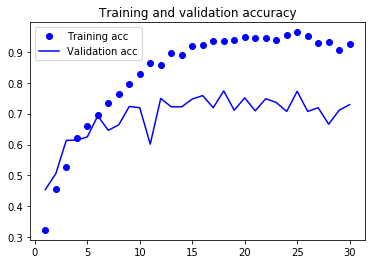

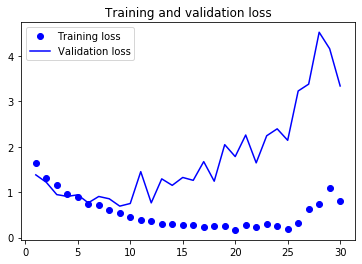

In [17]:
#  Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

epoch 5가 지나면서 부터 오버피팅이 되기 시작한다.

In [22]:
# Instantiating the VGG16 convolutional base
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [24]:
# Freezing all layers up to a specific one
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [26]:
# Fine-tuning the model
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
  4/100 [>.............................] - ETA: 6:36 - loss: 1.6769 - acc: 0.2250

KeyboardInterrupt: 